In [11]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch
from torch import nn
from importlib.util import find_spec
if find_spec("text_recognizer") is None:
    import sys
    sys.path.append('..')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from text_recognizer.networks.residual_network import IdentityBlock, ResidualBlock, BasicBlock, BottleNeckBlock, ResidualLayer, ResidualNetwork

In [3]:
from text_recognizer.networks import WideResidualNetwork

In [6]:
wr = WideResidualNetwork(
            in_channels= 1,
            num_classes= 80,
            in_planes=32,
            depth=10,
            num_layers=4,
            width_factor=1,
            dropout_rate= 0.2,
            activation= "SELU",
            use_decoder= True,
)

In [7]:
from torchsummary import summary

In [39]:
        backbone = nn.Sequential(
            *list(wr.children())[:][:-1]
        )


In [40]:
backbone

Sequential(
  (0): SELU(inplace=True)
  (1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): Sequential(
      (0): WideBlock(
        (activation): SELU(inplace=True)
        (blocks): Sequential(
          (0): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (1): SELU(inplace=True)
          (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (3): Dropout(p=0.2, inplace=False)
          (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (5): SELU(inplace=True)
          (6): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        )
      )
    )
    (2): Sequential(
      (0): WideBlock(
        (activation): SELU(inplace=True)
        (blocks): Sequential(
          (0): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (1): SELU(i

In [8]:
summary(wr, (1, 28, 952), device="cpu", depth=3)

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 256, 4, 119]         --
|    └─Conv2d: 2-1                       [-1, 32, 28, 952]         288
|    └─Sequential: 2-2                   [-1, 32, 28, 952]         --
|    |    └─WideBlock: 3-1               [-1, 32, 28, 952]         18,560
|    └─Sequential: 2-3                   [-1, 64, 14, 476]         --
|    |    └─WideBlock: 3-2               [-1, 64, 14, 476]         57,536
|    └─Sequential: 2-4                   [-1, 128, 7, 238]         --
|    |    └─WideBlock: 3-3               [-1, 128, 7, 238]         229,760
|    └─Sequential: 2-5                   [-1, 256, 4, 119]         --
|    |    └─WideBlock: 3-4               [-1, 256, 4, 119]         918,272
├─Sequential: 1-2                        [-1, 80]                  --
|    └─BatchNorm2d: 2-6                  [-1, 256, 4, 119]         512
├─SELU: 1-3                              [-1, 256, 4, 119]       

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 256, 4, 119]         --
|    └─Conv2d: 2-1                       [-1, 32, 28, 952]         288
|    └─Sequential: 2-2                   [-1, 32, 28, 952]         --
|    |    └─WideBlock: 3-1               [-1, 32, 28, 952]         18,560
|    └─Sequential: 2-3                   [-1, 64, 14, 476]         --
|    |    └─WideBlock: 3-2               [-1, 64, 14, 476]         57,536
|    └─Sequential: 2-4                   [-1, 128, 7, 238]         --
|    |    └─WideBlock: 3-3               [-1, 128, 7, 238]         229,760
|    └─Sequential: 2-5                   [-1, 256, 4, 119]         --
|    |    └─WideBlock: 3-4               [-1, 256, 4, 119]         918,272
├─Sequential: 1-2                        [-1, 80]                  --
|    └─BatchNorm2d: 2-6                  [-1, 256, 4, 119]         512
├─SELU: 1-3                              [-1, 256, 4, 119]       

In [64]:
from torch import nn

In [70]:
32 + 64

96

In [106]:
3 * 112

336

In [39]:
col_embed = nn.Parameter(torch.rand(1000, 256 // 2))

In [40]:
W, H = 196, 4

In [42]:
col_embed[:W].unsqueeze(0).repeat(H, 1, 1).shape

torch.Size([4, 196, 128])

In [44]:
col_embed[:H].unsqueeze(1).repeat(1, W, 1).shape

torch.Size([4, 196, 128])

In [60]:
           torch.cat(
                [
                    col_embed[:W].unsqueeze(0).repeat(H, 1, 1),
                    col_embed[:H].unsqueeze(1).repeat(1, W, 1),
                ],
                dim=-1,
            ).unsqueeze(0).shape

torch.Size([1, 4, 196, 256])

In [21]:
4 * 196

784

In [39]:
target = torch.tensor([1,1,12,1,1,1,1,1,9,9,9,9,9,9])

In [14]:
torch.nonzero(target == 9, as_tuple=False)[0].item()

8

In [16]:
target[:9]

tensor([ 1,  1, 12,  1,  1,  1,  1,  1,  9])

In [9]:
np.inf

inf

In [5]:
from text_recognizer.networks.transformer.positional_encoding import PositionalEncoding

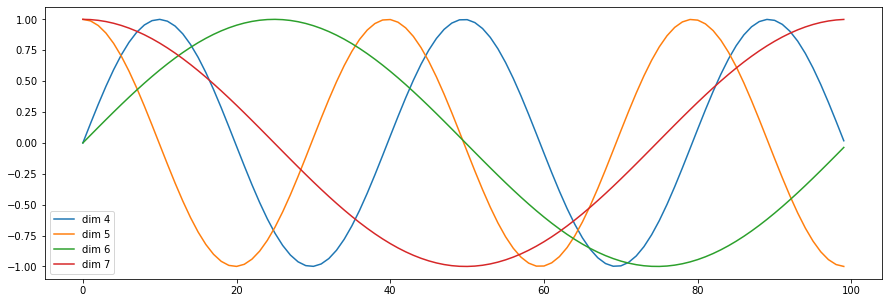

In [4]:
plt.figure(figsize=(15, 5))
pe = PositionalEncoding(20, 0)
y = pe.forward(torch.zeros(1, 100, 20))
plt.plot(np.arange(100), y[0, :, 4:8].data.numpy())
plt.legend(["dim %d"%p for p in [4,5,6,7]])
None

In [74]:
from text_recognizer.networks.densenet import DenseNet,_DenseLayer,_DenseBlock

In [113]:
dnet = DenseNet(12, (6, 8, 10, 6), 1, 24, 80, 4, 0, False)

In [114]:
summary(dnet, (1, 28, 952), device="cpu", depth=3)

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 168, 3, 119]         --
|    └─Conv2d: 2-1                       [-1, 24, 28, 952]         216
|    └─BatchNorm2d: 2-2                  [-1, 24, 28, 952]         48
|    └─ReLU: 2-3                         [-1, 24, 28, 952]         --
|    └─_DenseBlock: 2-4                  [-1, 96, 28, 952]         --
|    └─_Transition: 2-5                  [-1, 48, 14, 476]         --
|    |    └─Sequential: 3-1              [-1, 48, 14, 476]         4,800
|    └─_DenseBlock: 2-6                  [-1, 144, 14, 476]        --
|    └─_Transition: 2-7                  [-1, 72, 7, 238]          --
|    |    └─Sequential: 3-2              [-1, 72, 7, 238]          10,656
|    └─_DenseBlock: 2-8                  [-1, 192, 7, 238]         --
|    └─_Transition: 2-9                  [-1, 96, 3, 119]          --
|    |    └─Sequential: 3-3              [-1, 96, 3, 119]          18,816
|  

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 168, 3, 119]         --
|    └─Conv2d: 2-1                       [-1, 24, 28, 952]         216
|    └─BatchNorm2d: 2-2                  [-1, 24, 28, 952]         48
|    └─ReLU: 2-3                         [-1, 24, 28, 952]         --
|    └─_DenseBlock: 2-4                  [-1, 96, 28, 952]         --
|    └─_Transition: 2-5                  [-1, 48, 14, 476]         --
|    |    └─Sequential: 3-1              [-1, 48, 14, 476]         4,800
|    └─_DenseBlock: 2-6                  [-1, 144, 14, 476]        --
|    └─_Transition: 2-7                  [-1, 72, 7, 238]          --
|    |    └─Sequential: 3-2              [-1, 72, 7, 238]          10,656
|    └─_DenseBlock: 2-8                  [-1, 192, 7, 238]         --
|    └─_Transition: 2-9                  [-1, 96, 3, 119]          --
|    |    └─Sequential: 3-3              [-1, 96, 3, 119]          18,816
|  

In [29]:
from text_recognizer.networks import WideResidualNetwork

In [9]:
w = WideResidualNetwork(
        in_channels = 1,
        in_planes = 32,
        num_classes = 80,
        depth = 10,
        width_factor = 1,
        dropout_rate = 0.0,
        num_layers = 5,
        activation = "relu",
        use_decoder = False,)

In [10]:
summary(w, (1, 28, 952), device="cpu", depth=2)

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 512, 2, 60]          --
|    └─Conv2d: 2-1                       [-1, 32, 28, 952]         288
|    └─Sequential: 2-2                   [-1, 32, 28, 952]         18,560
|    └─Sequential: 2-3                   [-1, 64, 14, 476]         57,536
|    └─Sequential: 2-4                   [-1, 128, 7, 238]         229,760
|    └─Sequential: 2-5                   [-1, 256, 4, 119]         918,272
|    └─Sequential: 2-6                   [-1, 512, 2, 60]          3,671,552
Total params: 4,895,968
Trainable params: 4,895,968
Non-trainable params: 0
Total mult-adds (M): 22.36
Input size (MB): 0.10
Forward/backward pass size (MB): 6.51
Params size (MB): 18.68
Estimated Total Size (MB): 25.29


Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 512, 2, 60]          --
|    └─Conv2d: 2-1                       [-1, 32, 28, 952]         288
|    └─Sequential: 2-2                   [-1, 32, 28, 952]         18,560
|    └─Sequential: 2-3                   [-1, 64, 14, 476]         57,536
|    └─Sequential: 2-4                   [-1, 128, 7, 238]         229,760
|    └─Sequential: 2-5                   [-1, 256, 4, 119]         918,272
|    └─Sequential: 2-6                   [-1, 512, 2, 60]          3,671,552
Total params: 4,895,968
Trainable params: 4,895,968
Non-trainable params: 0
Total mult-adds (M): 22.36
Input size (MB): 0.10
Forward/backward pass size (MB): 6.51
Params size (MB): 18.68
Estimated Total Size (MB): 25.29

In [46]:
sz= 5

In [47]:
mask = torch.triu(torch.ones(sz, sz), 1)
mask = mask.masked_fill(mask==1, float('-inf'))

In [50]:

h = torch.rand(1, 256, 10, 10)

In [52]:
h.flatten(2).permute(2, 0, 1).shape

torch.Size([100, 1, 256])

In [91]:
h.flatten(2).permute(2, 0, 1).shape

torch.Size([100, 1, 256])

In [48]:
mask


tensor([[0., -inf, -inf, -inf, -inf],
        [0., 0., -inf, -inf, -inf],
        [0., 0., 0., -inf, -inf],
        [0., 0., 0., 0., -inf],
        [0., 0., 0., 0., 0.]])

In [8]:
120 / 8

15.0

In [27]:
2 * 60

120

In [12]:
import yaml

In [22]:
path = "../training/experiments/cnn_transformer.yml"

In [26]:
with open(path, "r") as f:
    f = yaml.safe_load(f)

In [27]:
f

{'experiment_group': 'Transformer Experiments',
 'experiments': [{'train_args': {'transformer_model': True,
    'batch_size': 16,
    'max_epochs': 128,
    'input_shape': [[1, 28, 952], [92]]},
   'dataset': {'type': 'EmnistLinesDataset',
    'args': {'subsample_fraction': None,
     'transform': [{'type': 'ToPILImage', 'args': None},
      {'type': 'Resize', 'args': {'size': [28, 952]}},
      {'type': 'ToTensor', 'args': None}],
     'max_length': 97,
     'min_overlap': 0.0,
     'max_overlap': 0.33,
     'num_samples': 1,
     'seed': 4711,
     'init_token': '<sos>',
     'pad_token': '_',
     'eos_token': '<eos>',
     'target_transform': [{'type': 'AddTokens',
       'args': {'init_token': '<sos>',
        'eos_token': '<eos>',
        'pad_token': '_'}}]},
    'train_args': {'num_workers': 8,
     'train_fraction': 0.85,
     'batch_size': 16}},
   'model': 'VisionTransformerModel',
   'metrics': ['accuracy'],
   'network': {'type': 'CNNTransformer',
    'args': {'backbone': 